In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
plt.style.use("ggplot")

# Creating sample data

In [248]:
# Creating Years from 2010 to 2020 and creating an np array for later usage
x = [2010 + number for number in range(11)]
np_x = np.array(x).reshape(-1, 1)

# Some example y values (could be sales or whatever)
y = [2000, 2250, 2800, 2850, 3542, 3707, 5556, 8544, 8555, 9100, 12000]
np_y = np.array(y).reshape(-1, 1)

# These are the years we want our model to make predictions for (note we want to start at 2010 as above to see the accuracy aswell)
pred = [2010 + number for number in range(21)]
np_pred = np.array(pred).reshape(-1, 1)

# Linear Regression

In [105]:
# creating model
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(np_x, y);

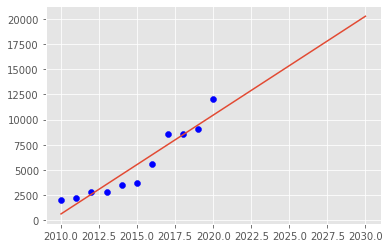

In [106]:
# Making the plot (matplotlib is the easiest for this)
plt.scatter(x, y, color = "blue")
plt.plot(x_pred, lr.predict(np_pred));

In [107]:
# Predicting values
for number in [2015, 2020, 2025, 2030]:
    
    val = lr.predict(np.array(number).reshape(-1, 1))[0]
    
    if number in x:
        print(f"Prediction for year {number}: {int(val)} - Real Value: {y[x.index(number)]}")
    else:
        print(f"Prediction for year {number}: {int(val)}")

Prediction for year 2015: 5536 - Real Value: 3707
Prediction for year 2020: 10448 - Real Value: 12000
Prediction for year 2025: 15361
Prediction for year 2030: 20273


# Logistic Regression

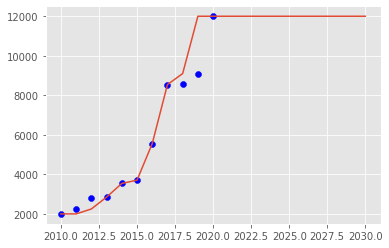

In [233]:
# creating the model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = "newton-cg").fit(np_x, y);

# Making the plot
plt.scatter(x, y, color="blue")
plt.plot(pred, lr.predict(np_pred));

# Polynomial Regression

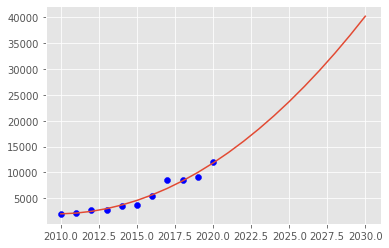

In [234]:
# creating the model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures()
x_poly = poly.fit_transform(np_x)
poly.fit(x_poly, y)

lr = LinearRegression()
lr.fit(x_poly, y);

plt.scatter(x, y, color = "blue")
plt.plot(np_pred, lr.predict(poly.fit_transform(np_pred)));

# Plotting with plotly

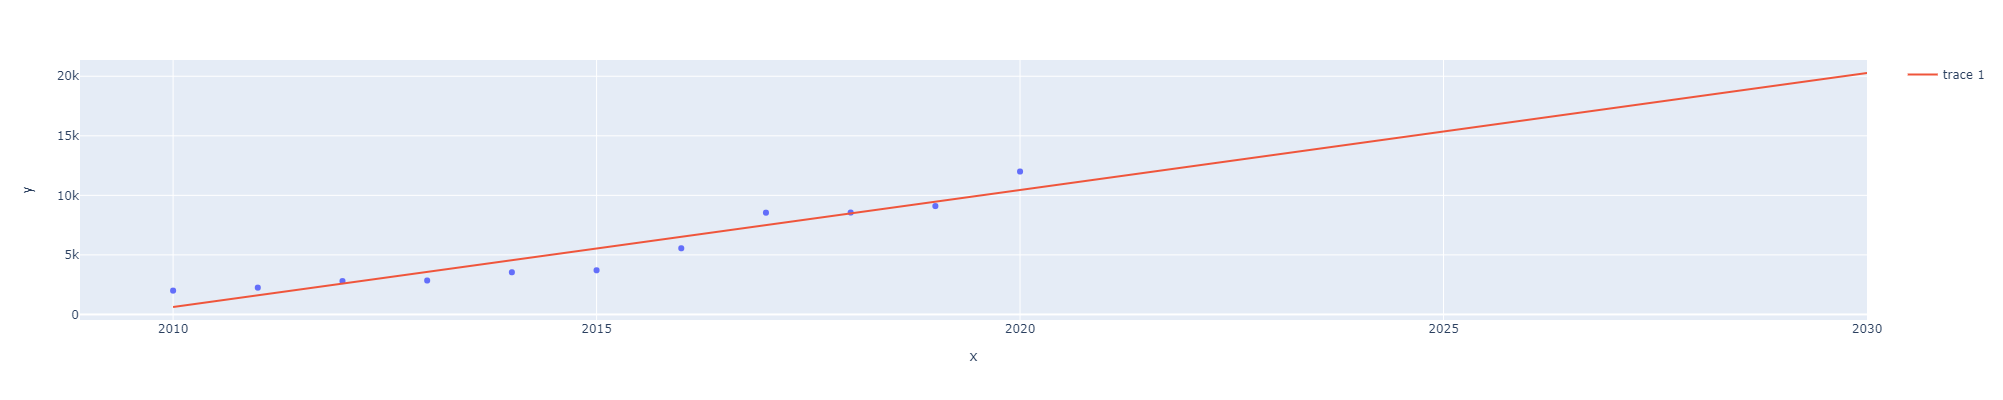

In [254]:
import plotly.express as px

lr = LinearRegression()
lr.fit(np_x, y)

fig = px.scatter(x = x, y = y)
fig.add_scatter(x = pred, y = lr.predict(np_pred), mode = "lines")

fig.update_layout(autosize = False, width = 800, height = 400)
fig.show()